In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('/content/accidents_2012_to_2014.csv', low_memory=False)
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037,597647,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,NaN,NaN,2,Yes,NaN,2014
464693,2.01E+12,321509,574063,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,NaN,NaN,2,Yes,NaN,2014
464694,2.01E+12,321337,566365,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,NaN,NaN,2,Yes,NaN,2014
464695,2.01E+12,323869,566853,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,NaN,NaN,2,Yes,NaN,2014


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

In [31]:
df.columns.values

array(['Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Time_of_Day'], dtype=object)

In [11]:
df.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012
5,201201BS70006,526090,177600,-0.185496,51.483253,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002912,2012
6,201201BS70007,527780,179680,-0.160418,51.501567,1,3,1,1,12/01/2012,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002818,2012
7,201201BS70008,524010,182080,-0.213862,51.523975,1,3,2,1,07/01/2012,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002905,2012
8,201201BS70010,527710,179290,-0.161567,51.498077,1,3,2,1,07/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,No,E01002818,2012
9,201201BS70011,525120,180060,-0.198587,51.505576,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002825,2012


In [39]:
df.dropna(inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Time' is in 'HH:MM:SS' format

# Extract hour from the 'Time' column
hours = pd.DataFrame(df["Time"].astype("datetime64[ns]"))
hours = pd.DataFrame(hours.Time.dt.strftime('%H').astype(int), columns=["Hour"])

# Define day (6 AM - 6 PM) and night (6 PM - 6 AM)
hours['Period'] = hours['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Count number of accidents for each period
accident_counts = hours['Period'].value_counts()

# Plot the number of accidents by period
plt.figure(figsize=(10, 6))
sns.barplot(x=accident_counts.index, y=accident_counts.values, palette='viridis')
plt.title('Number of Accidents: Day vs. Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [49]:
df_new = df.drop(['Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Police_Force','Special_Conditions_at_Site','Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident','LSOA_of_Accident_Location','Local_Authority_(District)','Local_Authority_(Highway)','1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number'], axis=1)

In [50]:
df_new.isnull().sum()

,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0
Time,13
Road_Type,0
Speed_limit,0
Junction_Detail,464697
Junction_Control,178610


In [51]:
df_new=df_new.fillna(0)

In [52]:
df_new['Year'].value_counts()

,count
Year,
2012,179715
2014,146322
2013,138660


In [53]:
weather_conditions_total = df_new['Weather_Conditions'].value_counts()
weather_conditions_total

,count
Weather_Conditions,
Fine without high winds,373167
Raining without high winds,57060
Other,8272
Unknown,8215
Raining with high winds,7120
Fine with high winds,5011
Snowing without high winds,2708
Fog or mist,2411
Snowing with high winds,733


In [54]:
road_conditions_total = df_new['Road_Surface_Conditions'].value_counts()
road_conditions_total

,count
Road_Surface_Conditions,
Dry,319370
Wet/Damp,132745
Frost/Ice,8140
Snow,2824
Flood (Over 3cm of water),863
0,755


<ipython-input-55-38318492e7c1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hours = pd.DataFrame(df["Time"].astype("datetime64[ns]"))


Text(0, 0.5, 'Number Of Accidents')

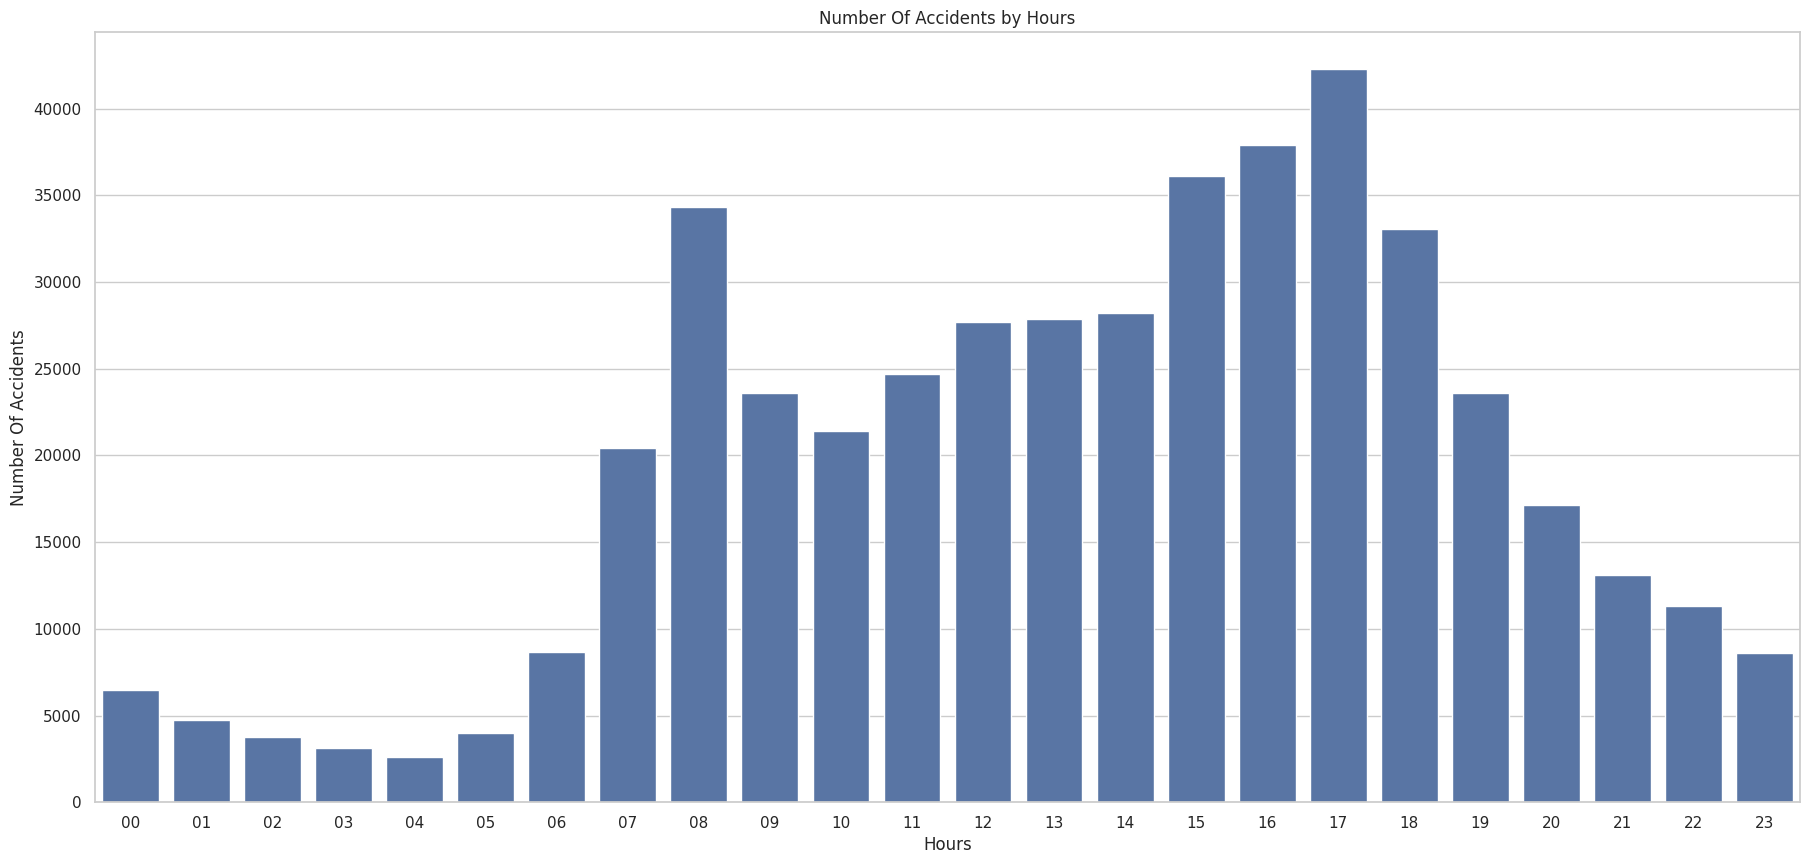

In [55]:
hours = pd.DataFrame(df["Time"].astype("datetime64[ns]"))
hours = pd.DataFrame(hours.Time.dt.strftime('%H').sort_values(),columns=["Time"])

plt.figure(figsize=(22,10))
sns.countplot(data=hours,x="Time")
plt.title("Number Of Accidents by Hours")
plt.xlabel("Hours")
plt.ylabel("Number Of Accidents")





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'Time' is missing
df = df.dropna(subset=['Time'])

# Extract hour from the 'Time' column
hours = pd.DataFrame(df["Time"].astype("datetime64[ns]"))
hours['Hour'] = hours.Time.dt.strftime('%H').astype(int)

# Define day (6 AM - 6 PM) and night (6 PM - 6 AM)
hours['Period'] = hours['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Plot the number of accidents by hour with specific colors for day and night
plt.figure(figsize=(22,10))
sns.countplot(data=hours, x="Hour", hue="Period", palette={"Day": "orange", "Night": "darkblue"})

plt.title("Number Of Accidents by Hour")
plt.xlabel("Hours")
plt.ylabel("Number Of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'Time' is missing
df_clean = df.dropna(subset=['Time'])

# Extract hour from the 'Time' column
hours = pd.DataFrame(df_clean["Time"].astype("datetime64[ns]"))
hours['Hour'] = hours.Time.dt.strftime('%H').astype(int)

# Define day (6 AM - 6 PM) and night (6 PM - 6 AM)
hours['Period'] = hours['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Count number of accidents for each period
accident_counts = hours['Period'].value_counts()

# Plot the number of accidents by period
plt.figure(figsize=(10, 6))
sns.barplot(x=accident_counts.index, y=accident_counts.values, palette='viridis')
plt.title('Number of Accidents: Day vs. Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Road_Surface_Conditions', ylabel='count'>

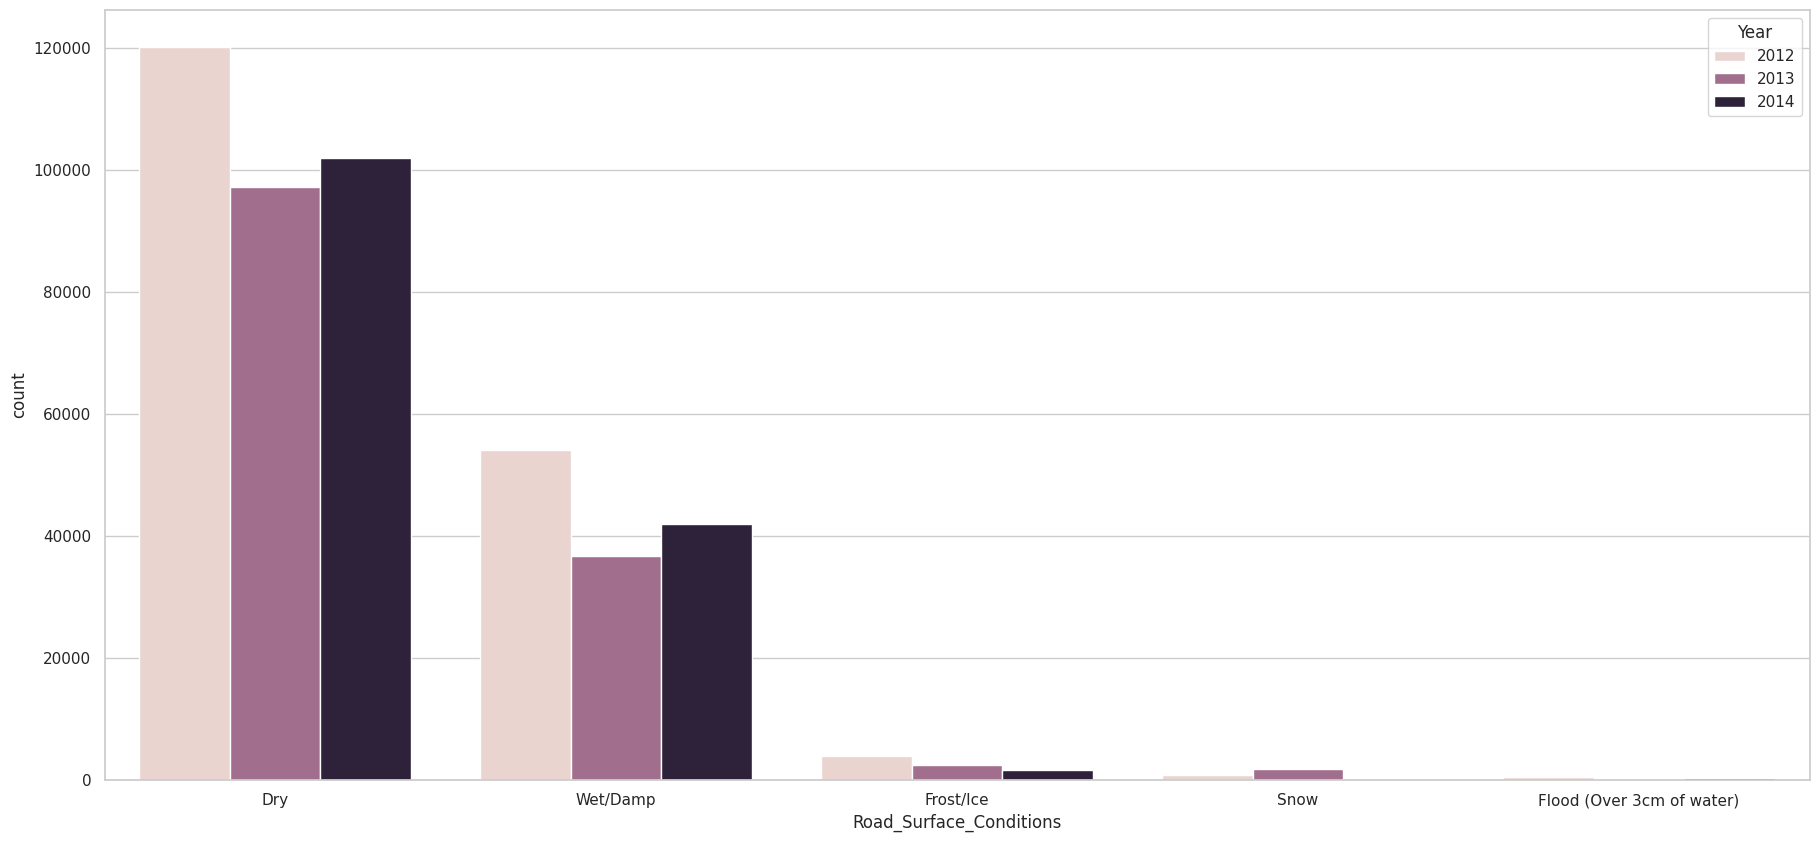

In [20]:
plt.figure(figsize=(22,10))
sns.countplot(data=df,x="Road_Surface_Conditions",hue="Year")

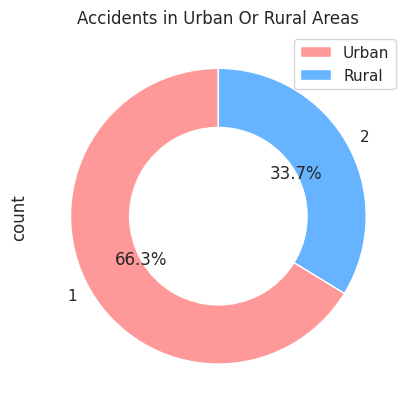

In [65]:
import matplotlib.pyplot as plt

# Plot the pie chart with percentages
df_new['Urban_or_Rural_Area'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  # This will display the percentage on the pie chart
    colors=['#ff9999','#66b3ff'],  # Optional: Customize colors
    startangle=90,      # Optional: Rotate the start angle for better visual
    wedgeprops=dict(width=0.4)  # Optional: Adjust the width of the pie slices
)

# Add a legend and title
plt.legend(loc="upper right", labels=["Urban", "Rural"])
plt.title("Accidents in Urban Or Rural Areas")
plt.show()


<Figure size 960x640 with 0 Axes>

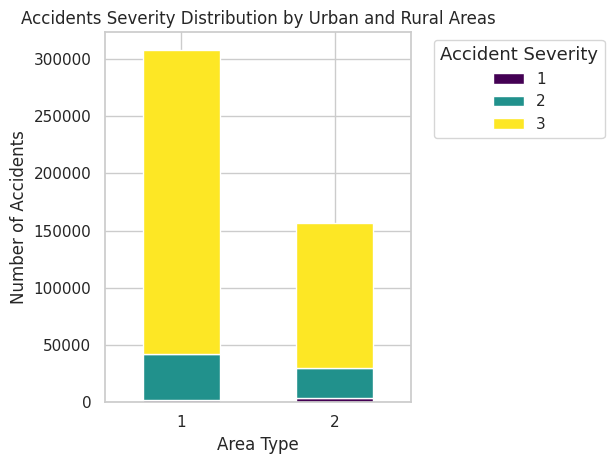

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_new is your DataFrame

# Prepare the data: aggregate accident severity by area type
severity_by_area = df_new.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack(fill_value=0)

# Plot the bar chart
plt.figure(figsize=(12, 8), dpi=80)
severity_by_area.plot(kind='bar', stacked=True, colormap='viridis')  # 'viridis' is a colormap, you can use others like 'Set1'

# Add labels and title
plt.title('Accidents Severity Distribution by Urban and Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Accident Severity', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


In [66]:
df.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,3,2,1,5,1,2,2,2,1,2012
1,3,2,1,4,1,2,2,2,1,2012
2,3,2,1,3,3,1,2,2,1,2012
3,3,1,1,4,1,1,2,2,1,2012
4,3,1,1,3,1,2,2,2,1,2012


<ipython-input-30-7e687286e6c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


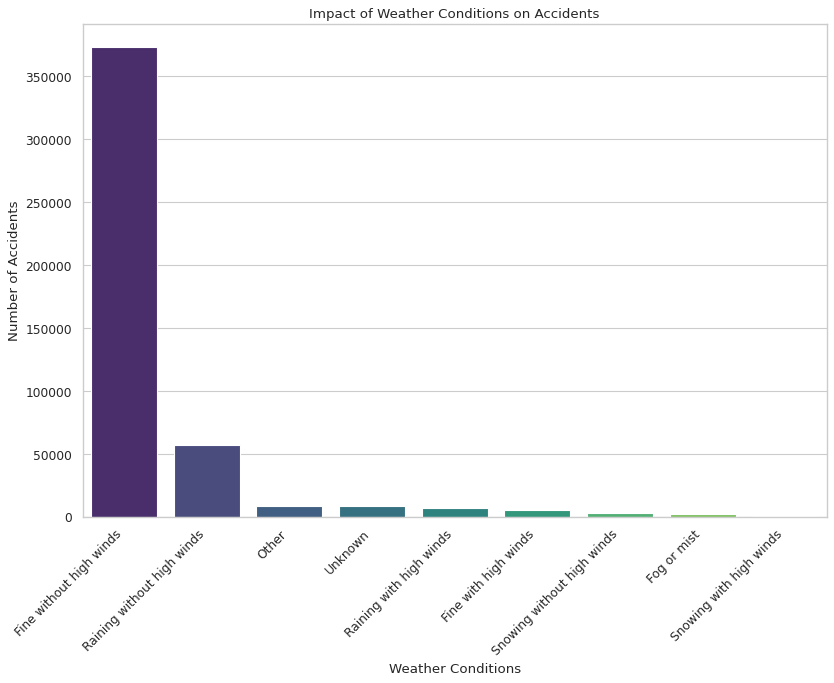

In [30]:
plt.figure(figsize=(12, 8), dpi=80)
sns.barplot(
    x=weather_conditions_total.index,
    y=weather_conditions_total.values,
    palette="viridis"  # You can choose any palette you prefer
)
plt.title('Impact of Weather Conditions on Accidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha="right")
plt.show()


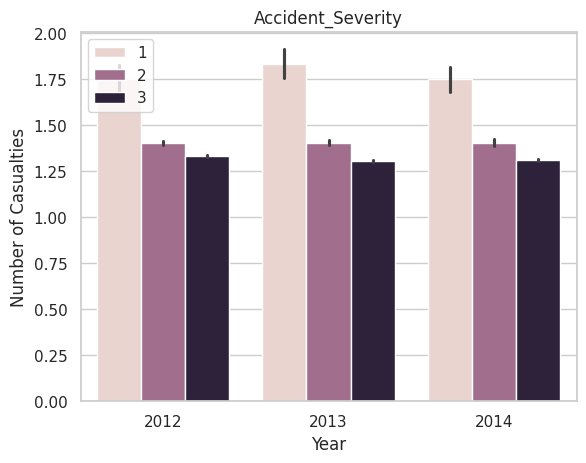

In [32]:
sns.barplot(x="Year",y="Number_of_Casualties",data=df,hue="Accident_Severity")
plt.title("Accident_Severity")
plt.ylabel("Number of Casualties")
plt.legend(loc="upper left")
plt.show()

In [33]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012


In [34]:
df["Road_Type"]=[1 if each == "Single carriageway" else 2
                          if each == "Dual carriageway" else 3
                          if each == "One way street" else 4
                          if each == "Roundabout" else 5
                          if each == "Slip road" else 6
                          for each in df["Road_Type"]]

In [35]:
df["Road_Type"].value_counts()

,count
Road_Type,
1,351268
2,65998
4,31852
3,9074
5,4827
6,1678


In [36]:
df["Weather_Conditions"]=[1 if each == "Raining without high winds" else 2
                          if each == "Fine without high winds" else 3
                          if each == "Unknown" else 4
                          if each == "Snowing without high winds" else 5
                          if each == "Other" else 6
                          if each == "Fine with high winds" else 7
                          if each == "Raining with high winds" else 8
                          if each == "Fog or mist" else 9
                          for each in df["Weather_Conditions"]]

In [37]:
df["Weather_Conditions"].value_counts()

,count
Weather_Conditions,
2,373167
1,57060
5,8272
3,8215
7,7120
6,5011
4,2708
8,2411
9,733


In [38]:
df["Road_Surface_Conditions"]=[1 if each == "Wet/Damp" else 2
                          if each == "Dry" else 3
                          if each == "Frost/Ice" else 4
                          if each == "Snow" else 5
                          for each in df["Road_Surface_Conditions"]]

In [39]:
df["Road_Surface_Conditions"].value_counts()

,count
Road_Surface_Conditions,
2,319370
1,132745
3,8140
4,2824
5,1618


In [40]:
df["Light_Conditions"]=[1 if each == "Daylight: Street light present" else 2
                          if each == "Darkness: Street lights present and lit" else 3
                          if each == "Darkness: Street lighting unknown" else 4
                          if each == "Darkness: Street lights present but unlit" else 5
                          if each == "Darkeness: No street lighting" else 6
                          for each in df["Light_Conditions"]]

In [41]:
df["Light_Conditions"].value_counts()

,count
Light_Conditions,
1,341124
2,91158
5,22999
3,6853
4,2563


In [42]:
df.drop(["Time"], axis=1, inplace=True)

In [ ]:
df.head()

In [47]:
df.isnull().sum()

,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


In [51]:
# Specify the columns you want to keep
desired_columns = ['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
                   'Day_of_Week', 'Road_Type', 'Light_Conditions', 'Weather_Conditions',
                   'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Year']

# Select only the desired columns
df = df[desired_columns]

# Drop rows with any null values
df = df.dropna()


# Check if there are any null values remaining
null_counts = df.isnull().sum()
print(null_counts)  # Should print zeros for all columns if there are no null values left


Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64


In [52]:
X = df.drop(["Accident_Severity"],axis=1).values
y = df["Accident_Severity"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((371757, 9), (92940, 9), (371757,), (92940,))

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators=500)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.15824065359250594


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:

print('Training score: ', classifier.score(X_train, y_train))
print('Testing score:  ', classifier.score(X_test, y_test))
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Additional evaluation metrics
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
result2 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score")
print(result2)

In [1]:
import folium
import branca
import pandas as pd
print(folium.__file__)
print(folium.__version__)

/usr/local/lib/python3.10/dist-packages/folium/__init__.py
0.17.0


In [2]:
df_2009_2011 = pd.read_csv('/content/accidents_2009_to_2011.csv',
                           usecols=['Longitude','Latitude','Number_of_Vehicles',
                           'Number_of_Casualties','LSOA_of_Accident_Location',
                           'Day_of_Week','Light_Conditions','Weather_Conditions',
                           'Road_Surface_Conditions','Year','Date','Time'])
df_2009_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469442 entries, 0 to 469441
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Longitude                  469442 non-null  float64
 1   Latitude                   469442 non-null  float64
 2   Number_of_Vehicles         469442 non-null  int64  
 3   Number_of_Casualties       469442 non-null  int64  
 4   Date                       469442 non-null  object 
 5   Day_of_Week                469442 non-null  int64  
 6   Time                       469405 non-null  object 
 7   Light_Conditions           469442 non-null  object 
 8   Weather_Conditions         469336 non-null  object 
 9   Road_Surface_Conditions    468901 non-null  object 
 10  LSOA_of_Accident_Location  437433 non-null  object 
 11  Year                       469442 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 43.0+ MB


In [3]:
df = df_2009_2011[(df_2009_2011['Year']==2010) & (df_2009_2011['LSOA_of_Accident_Location']=='E01004736')]
print(len(df))
df.head()

125


,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,LSOA_of_Accident_Location,Year
164601,-0.127917,51.507077,2,1,17/01/2010,1,17:45,Daylight: Street light present,Fine without high winds,Wet/Damp,E01004736,2010
164603,-0.132677,51.506973,2,1,18/01/2010,2,17:45,Daylight: Street light present,Fine without high winds,Dry,E01004736,2010
164607,-0.130712,51.505683,2,1,20/01/2010,4,12:27,Daylight: Street light present,Fine without high winds,Wet/Damp,E01004736,2010
164621,-0.134608,51.509072,1,1,22/01/2010,6,14:20,Daylight: Street light present,Raining without high winds,Wet/Damp,E01004736,2010
164662,-0.128910,51.507453,2,1,29/01/2010,6,17:40,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,E01004736,2010


In [5]:

#location is the mean of every lat and long point to centre the map.
location = df['Latitude'].mean(), df['Longitude'].mean()

#A basemap is then created using the location to centre on and the zoom level to start.
m = folium.Map(location=location,zoom_start=15)

#Each location in the DataFrame is then added as a marker to the basemap points are then added to the map
for i in range(0,len(df)):
    folium.Marker([df['Latitude'].iloc[i],df['Longitude'].iloc[i]]).add_to(m)

In [ ]:
location = df['Latitude'].mean(), df['Longitude'].mean()
m = folium.Map(location=location,zoom_start=15)

for i in range(0,len(df)):

    popup = folium.Popup('Accident', parse_html=True)
    folium.Marker([df['Latitude'].iloc[i],df['Longitude'].iloc[i]],popup=popup).add_to(m)
m

In [8]:
df['Number_of_Casualties'].value_counts()

,count
Number_of_Casualties,
1,110
2,14
3,1


In [ ]:
import folium

# Create a map centered around the average latitude and longitude
location = df[['Latitude', 'Longitude']].mean().tolist()
m = folium.Map(location=location, zoom_start=15)

# Add CircleMarkers to the map
for i in range(len(df)):
    num_of_casualties = df['Number_of_Casualties'].iloc[i]

    # Define color and radius based on number of casualties
    if num_of_casualties == 1:
        color = 'blue'
        radius = 5
    elif num_of_casualties == 2:
        color = 'green'
        radius = 10
    else:
        color = 'red'
        radius = 15

    # Add a CircleMarker to the map
    folium.CircleMarker(
        location=[df['Latitude'].iloc[i], df['Longitude'].iloc[i]],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(f'Number of Casualties: {num_of_casualties}', parse_html=True)
    ).add_to(m)

# Display the map
m


In [10]:
data_heat = df[['Latitude','Longitude','Number_of_Casualties']].values.tolist()

In [ ]:
import folium.plugins as plugins

m = folium.Map(location=location, zoom_start=15)
#tiles='stamentoner'

plugins.HeatMap(data_heat).add_to(m)

m

In [ ]:
import re
from typing import Dict, Optional

class PrecautionAdvisor:
    def __init__(self, precautions: Dict[str, str]):
        """
        Initialize the advisor with a dictionary of precautions.

        Parameters:
        - precautions (Dict[str, str]): A dictionary where keys are topics and values are precautionary measures.
        """
        self.precautions = precautions

    def _find_matching_key(self, query: str) -> Optional[str]:
        """
        Find the most relevant key in the dictionary based on the query.

        Parameters:
        - query (str): The user's query or topic of interest.

        Returns:
        - Optional[str]: The matching key or None if no match is found.
        """
        query = query.lower()
        for key in self.precautions:
            if re.search(r'\b' + re.escape(key) + r'\b', query):
                return key
        return None

    def get_precaution_answer(self, query: str) -> str:
        """
        Retrieve the precautionary measure based on the user's query.

        Parameters:
        - query (str): The user's question or topic of interest.

        Returns:
        - str: The precautionary measure related to the query or a default message if no match is found.
        """
        key = self._find_matching_key(query)
        if key:
            return self.precautions[key]
        return "Sorry, I don't have information on that topic."

def main():
    precautions_dict = {
        "road conditions": "Ensure road conditions are checked before travel. Avoid driving on poorly maintained roads during adverse weather conditions.",
        "weather conditions": "Check weather forecasts before traveling. Avoid driving during severe weather conditions like heavy rain or snow.",
        "driving behavior": "Follow speed limits and avoid distractions while driving. Always wear seat belts and maintain a safe distance from other vehicles.",
        "vehicle maintenance": "Regularly check and maintain your vehicle. Ensure that brakes, lights, and tires are in good condition.",
        "accident procedures": "In case of an accident, ensure safety first, call emergency services, and exchange information with the other party involved."
    }

    advisor = PrecautionAdvisor(precautions_dict)

    print("Welcome to the Accident Precaution Advisor!")
    print("Type 'exit' to quit the program.")

    while True:
        query = input("Enter your question or topic: ")
        if query.lower() == 'exit':
            break
        response = advisor.get_precaution_answer(query)
        print(response)

if __name__ == "__main__":
    main()
